<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4.5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
			</font>
			<br />
			<br />
			<font color=#FF7983>
دانشگاه تهران - دانشکده مهندسی مکانیک
            </font>
            <br />
			<font color=midblue>
مبانی الکترونیک
            </font>
			<br />
           <font color=#738a9b> 
زمستان ۱۴۰۱
               </div>
		<hr/>
		<font color='red' size=6>
			<div align=center>
پروژه تحلیل ترانزیستور 
            </div>
		</font>
        <br />
		<div align=center>
بهیاد زرنقی 
            <br />
            شماره دانشجویی: ۸۱۰۶۹۸۲۴۹
        </div>
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            
		
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10, exp, e, pow, sqrt

At first we define given data of our circuit and bipolar transistor. Units for the Voltage is per **V**, for current is per **A** and for resistance is per $\Omega$

In [14]:
Beta=100
I_S=pow(10,-17)
V_BE=0.7
V_cc=4
V_T=0.026
R1=25000
R2=8000
R3=1000
R4=150

# Section 1:

For the first part in our project there is no resistentance in Emitter and $R_{4}$ equals to zero. therefore schematic of our circuit will be like this:

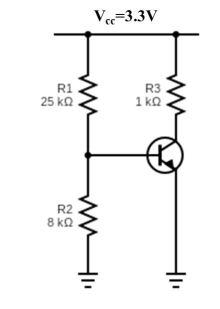

In [72]:
from PIL import Image
myImage = Image. open("Pictures//Project1.png")
myImage

As a first step we need to have an assumption of $V_{BE}$. then we will update its value iteratively until we reach to a convergence. In the code we have assigned a threshold of 0.00001.
we start our analysis with $V_{BE} = 0.7 V $

For determining the working point and current value passing from collector section we will use Thevenin & Norton approach.
the relations for this part would be:

$$\mathrm{V}_{th} = \frac{\mathrm{R}_{2}}{\mathrm{R}_{2} + \mathrm{R}_{1}}\times\mathrm{V}_{cc}$$


$$\mathrm{R}_{th} = \frac{\mathrm{R}_{2}\times\mathrm{R}_{1}}{\mathrm{R}_{2} + \mathrm{R}_{1}}$$

By implementing KVL between base and emitters ends we will have:

$$ -\mathrm{V}_{th} + \mathrm{V}_{BE} + \mathrm{R}_{th}\times\mathrm{I}_{B} = 0 $$




$$ \mathrm{I}_{B}= \frac{\mathrm{V}_{th} - \mathrm{V}_{BE}}{\mathrm{R}_{th}} $$


As we find out $I_{B}$ value we can reach to $I_{C}$ value by multiplying it to $\beta$.

$$ \mathrm{I}_{C}= \beta \times \mathrm{I}_{B} $$

As we find the value of $I_{c}$, we can start updating $V_{BE}$ value with the help of this relation.

$$ V_{BE(new)}=V_{T} \times log(\frac{I_{C}}{I_{S}})$$

we continue the process of updating as we finally reach to a convergence with $V_{BE}$ value. therefore finlalized value of $I_{C}$ will be fixed when the difference between $V_{BE}$ and $V_{BE(new)}$ reaches beneath 0.00001 . As we change domain of  $R_{2}$ and  $\beta$ we repeat the same action to obtain $I_{C}$ and save it in a list format.

In [11]:
R2_range=np.linspace(R2,1.1*R2,100)
I_B=0
I_C=0
I_C_list1 =list()
for R_2 in R2_range:
    V_BE=0.7

    for i in range(40):
        V_th=( (R_2) / (R_2+R1) ) * V_cc
        R_th=( (R_2*R1) / (R_2+R1) )
        I_B= (V_th - V_BE) / (R_th)
        I_C= Beta * I_B
        V_BE_new= V_T * log(I_C/I_S)
        if (abs(V_BE-V_BE_new)<0.00001):
            print("V_BE:{:.4f}, V_BE_new:{:.4f}".format(V_BE,V_BE_new))  
            I_C_list1.append(I_C)
            break
        else :
            V_BE=V_BE_new

V_BE:0.8548, V_BE_new:0.8548
V_BE:0.8549, V_BE_new:0.8549
V_BE:0.8550, V_BE_new:0.8550
V_BE:0.8551, V_BE_new:0.8551
V_BE:0.8553, V_BE_new:0.8553
V_BE:0.8554, V_BE_new:0.8554
V_BE:0.8555, V_BE_new:0.8555
V_BE:0.8556, V_BE_new:0.8556
V_BE:0.8557, V_BE_new:0.8557
V_BE:0.8558, V_BE_new:0.8558
V_BE:0.8560, V_BE_new:0.8560
V_BE:0.8561, V_BE_new:0.8561
V_BE:0.8562, V_BE_new:0.8562
V_BE:0.8563, V_BE_new:0.8563
V_BE:0.8564, V_BE_new:0.8564
V_BE:0.8565, V_BE_new:0.8565
V_BE:0.8566, V_BE_new:0.8566
V_BE:0.8567, V_BE_new:0.8567
V_BE:0.8568, V_BE_new:0.8568
V_BE:0.8569, V_BE_new:0.8570
V_BE:0.8571, V_BE_new:0.8571
V_BE:0.8572, V_BE_new:0.8572
V_BE:0.8573, V_BE_new:0.8573
V_BE:0.8574, V_BE_new:0.8574
V_BE:0.8575, V_BE_new:0.8575
V_BE:0.8576, V_BE_new:0.8576
V_BE:0.8577, V_BE_new:0.8577
V_BE:0.8578, V_BE_new:0.8578
V_BE:0.8579, V_BE_new:0.8579
V_BE:0.8580, V_BE_new:0.8580
V_BE:0.8581, V_BE_new:0.8581
V_BE:0.8582, V_BE_new:0.8582
V_BE:0.8583, V_BE_new:0.8583
V_BE:0.8584, V_BE_new:0.8584
V_BE:0.8585, V

We can observe convergence in $V_{BE}$ value.

In [91]:
V_BE=0.7
for i in range(20):
    V_th=( (R2) / (R2+R1) ) * V_cc
    R_th=( (R2*R1) / (R2+R1) )
    I_B= (V_th - V_BE) / (R_th)
    I_C= Beta * I_B
    V_BE_new= V_T * log(I_C/I_S)
#         print(V_BE)
    print(V_BE_new)
    V_BE=V_BE_new

0.8769564803504646
0.8492016405426432
0.8560085922392086
0.8544966970343627
0.8548401814930362
0.8547625433407638
0.854780112263403
0.8547761375891529
0.8547770368457608
0.8547768333947167
0.8547768794243507
0.8547768690104167
0.8547768713665084
0.8547768708334563
0.8547768709540563
0.8547768709267713
0.8547768709329444
0.8547768709315477
0.8547768709318637
0.8547768709317922


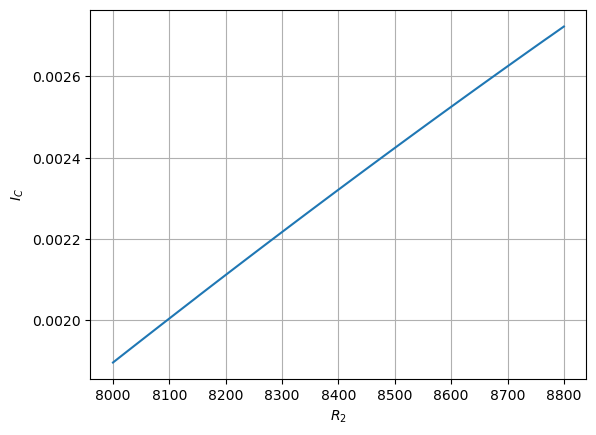

In [4]:
plt.plot(R2_range, I_C_list1);
plt.ylabel('$I_{C}$');
plt.xlabel('$R_{2}$');
plt.grid()

In [16]:
Beta_range=np.linspace(Beta,1.2*Beta,100)
I_B=0
I_C=0
I_C_list2 =list()
for B in Beta_range:
    
    V_BE=0.7

    for i in range(40):
        V_th=( (R2) / (R2+R1) ) * V_cc
        R_th=( (R2*R1) / (R2+R1) )
        I_B= (V_th - V_BE) / (R_th)
        I_C= B * I_B
        V_BE_new= V_T * log(I_C/I_S)
        if abs(V_BE_new-V_BE)<0.00001:
            print("V_BE:{:.4f}, V_BE_new:{:.4f}".format(V_BE_new,V_BE))  
            I_C_list2.append(I_C)
            break
        else :
            V_BE=V_BE_new

V_BE:0.8548, V_BE_new:0.8548
V_BE:0.8548, V_BE_new:0.8548
V_BE:0.8549, V_BE_new:0.8549
V_BE:0.8549, V_BE_new:0.8549
V_BE:0.8549, V_BE_new:0.8550
V_BE:0.8550, V_BE_new:0.8550
V_BE:0.8550, V_BE_new:0.8550
V_BE:0.8551, V_BE_new:0.8551
V_BE:0.8551, V_BE_new:0.8551
V_BE:0.8552, V_BE_new:0.8552
V_BE:0.8552, V_BE_new:0.8552
V_BE:0.8552, V_BE_new:0.8552
V_BE:0.8553, V_BE_new:0.8553
V_BE:0.8553, V_BE_new:0.8553
V_BE:0.8554, V_BE_new:0.8554
V_BE:0.8554, V_BE_new:0.8554
V_BE:0.8555, V_BE_new:0.8555
V_BE:0.8555, V_BE_new:0.8555
V_BE:0.8555, V_BE_new:0.8555
V_BE:0.8556, V_BE_new:0.8556
V_BE:0.8556, V_BE_new:0.8556
V_BE:0.8557, V_BE_new:0.8557
V_BE:0.8557, V_BE_new:0.8557
V_BE:0.8557, V_BE_new:0.8557
V_BE:0.8558, V_BE_new:0.8558
V_BE:0.8558, V_BE_new:0.8558
V_BE:0.8559, V_BE_new:0.8559
V_BE:0.8559, V_BE_new:0.8559
V_BE:0.8559, V_BE_new:0.8559
V_BE:0.8560, V_BE_new:0.8560
V_BE:0.8560, V_BE_new:0.8560
V_BE:0.8561, V_BE_new:0.8561
V_BE:0.8561, V_BE_new:0.8561
V_BE:0.8561, V_BE_new:0.8561
V_BE:0.8562, V

We can observe convergence in $V_{BE}$ value.

In [97]:
V_BE=0.7
for i in range(20):
    V_th=( (R2) / (R2+R1) ) * V_cc
    R_th=( (R2*R1) / (R2+R1) )
    I_B= (V_th - V_BE) / (R_th)
    I_C= Beta * I_B
    V_BE_new= V_T * log(I_C/I_S)
#        print(V_BE)
    print(V_BE_new)
    V_BE=V_BE_new

0.8769564803504646
0.8492016405426432
0.8560085922392086
0.8544966970343627
0.8548401814930362
0.8547625433407638
0.854780112263403
0.8547761375891529
0.8547770368457608
0.8547768333947167
0.8547768794243507
0.8547768690104167
0.8547768713665084
0.8547768708334563
0.8547768709540563
0.8547768709267713
0.8547768709329444
0.8547768709315477
0.8547768709318637
0.8547768709317922


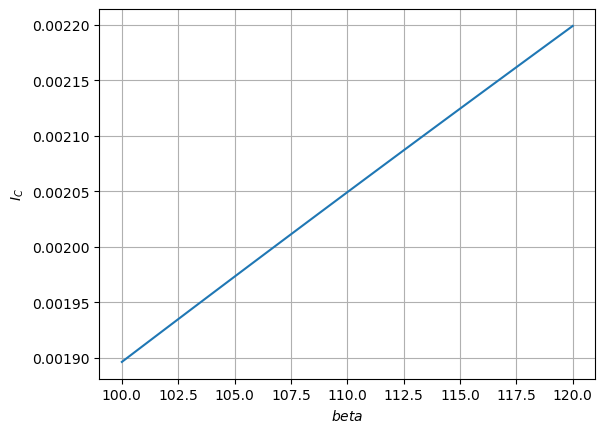

In [17]:
plt.plot(Beta_range, I_C_list2);
plt.ylabel('$I_{C}$');
plt.xlabel('$beta$');
plt.grid()

# Section 2:

In the next step we take $R_{4}$ to the consideration. the schematic of the problem will be:

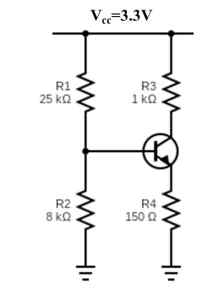

In [75]:
from PIL import Image
myImage = Image. open("Pictures//Project2.jpg")
myImage

We will face an alter in KVL relation as shown below:


$$ -\mathrm{V}_{th} + \mathrm{V}_{BE} + \mathrm{R}_{th}\times\mathrm{I}_{B} +{R}_{4}\times{I}_{E}= 0 $$

$$ {I}_{E}={I}_{B}\times\beta $$


$$ \mathrm{I}_{B}= \frac{\mathrm{V}_{th} - \mathrm{V}_{BE}}{\mathrm{R}_{th} + {R}_{4}\times\beta} $$

In [18]:
R2_range=np.linspace(R2,1.1*R2,100)
I_B=0
I_C=0
I_C_list3 =list()
for R_2 in R2_range:
    V_BE=0.7

    for i in range(40):
        V_th=( (R_2) / (R_2+R1) ) * V_cc
        R_th=( (R_2*R1) / (R_2+R1) )
        I_B= (V_th - V_BE) / (R_th+ Beta*R4)
        I_C= Beta * I_B
        V_BE_new= V_T * log(I_C/I_S)
        if abs(V_BE_new-V_BE)<0.00001:
            print("V_BE:{:.4f}, V_BE_new:{:.4f}".format(V_BE_new,V_BE))  
            I_C_list3.append(I_C)
            break
        else :
            V_BE=V_BE_new

V_BE:0.8279, V_BE_new:0.8279
V_BE:0.8280, V_BE_new:0.8280
V_BE:0.8281, V_BE_new:0.8281
V_BE:0.8282, V_BE_new:0.8282
V_BE:0.8283, V_BE_new:0.8283
V_BE:0.8284, V_BE_new:0.8284
V_BE:0.8285, V_BE_new:0.8285
V_BE:0.8286, V_BE_new:0.8286
V_BE:0.8287, V_BE_new:0.8287
V_BE:0.8288, V_BE_new:0.8288
V_BE:0.8289, V_BE_new:0.8289
V_BE:0.8290, V_BE_new:0.8290
V_BE:0.8292, V_BE_new:0.8291
V_BE:0.8293, V_BE_new:0.8293
V_BE:0.8294, V_BE_new:0.8294
V_BE:0.8295, V_BE_new:0.8295
V_BE:0.8296, V_BE_new:0.8296
V_BE:0.8297, V_BE_new:0.8297
V_BE:0.8298, V_BE_new:0.8298
V_BE:0.8299, V_BE_new:0.8299
V_BE:0.8300, V_BE_new:0.8300
V_BE:0.8301, V_BE_new:0.8301
V_BE:0.8302, V_BE_new:0.8302
V_BE:0.8303, V_BE_new:0.8303
V_BE:0.8304, V_BE_new:0.8304
V_BE:0.8305, V_BE_new:0.8305
V_BE:0.8306, V_BE_new:0.8306
V_BE:0.8307, V_BE_new:0.8307
V_BE:0.8308, V_BE_new:0.8308
V_BE:0.8309, V_BE_new:0.8309
V_BE:0.8310, V_BE_new:0.8310
V_BE:0.8311, V_BE_new:0.8311
V_BE:0.8312, V_BE_new:0.8312
V_BE:0.8313, V_BE_new:0.8312
V_BE:0.8313, V

We can observe convergence in $V_{BE}$ value.

In [102]:
V_BE=0.7
for i in range(20):
    V_th=( (R_2) / (R_2+R1) ) * V_cc
    R_th=( (R_2*R1) / (R_2+R1) )
    I_B= (V_th - V_BE) / (R_th+ Beta*R4)
    I_C= Beta * I_B
    V_BE_new= V_T * log(I_C/I_S)
    print(V_BE_new)
    V_BE=V_BE_new

0.8501546110577302
0.8350888802657217
0.8370602074413696
0.8368106043012088
0.836842341062219
0.8368383079174688
0.8368388204889282
0.8368387553468971
0.8368387636257211
0.8368387625735751
0.8368387627072912
0.8368387626902974
0.836838762692457
0.8368387626921827
0.8368387626922176
0.8368387626922131
0.8368387626922137
0.8368387626922136
0.8368387626922136
0.8368387626922136


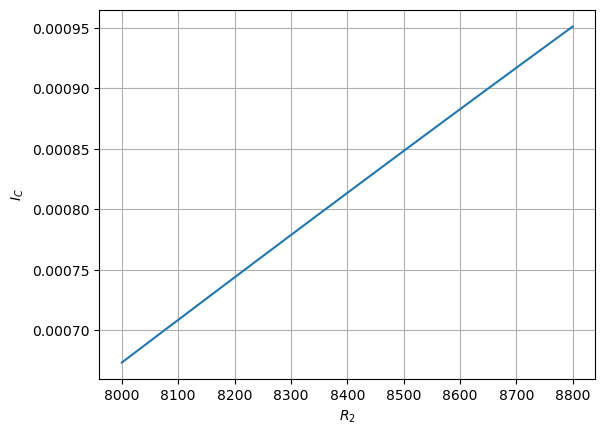

In [19]:
plt.plot(R2_range, I_C_list3);
plt.ylabel('$I_{C}$');
plt.xlabel('$R_{2}$');
plt.grid()

In [20]:
Beta_range=np.linspace(Beta,1.2*Beta,100)
I_B=0
I_C=0
I_C_list4 =list()
for B in Beta_range:
    
    V_BE=0.7

    for i in range(40):
        V_th=( (R2) / (R2+R1) ) * V_cc
        R_th=( (R2*R1) / (R2+R1) )
        I_B= (V_th - V_BE) / (R_th+ Beta*R4)
        I_C= B * I_B
        V_BE_new= V_T * log(I_C/I_S)
#         print(V_BE_new)
        if abs(V_BE_new-V_BE)<0.00001:
            print("V_BE:{:.4f}, V_BE_new:{:.4f}".format(V_BE_new,V_BE))  
            I_C_list4.append(I_C)
            break
        else :
            V_BE=V_BE_new    
    

V_BE:0.8279, V_BE_new:0.8279
V_BE:0.8279, V_BE_new:0.8279
V_BE:0.8280, V_BE_new:0.8279
V_BE:0.8280, V_BE_new:0.8280
V_BE:0.8280, V_BE_new:0.8280
V_BE:0.8281, V_BE_new:0.8281
V_BE:0.8281, V_BE_new:0.8281
V_BE:0.8282, V_BE_new:0.8282
V_BE:0.8282, V_BE_new:0.8282
V_BE:0.8283, V_BE_new:0.8283
V_BE:0.8283, V_BE_new:0.8283
V_BE:0.8283, V_BE_new:0.8283
V_BE:0.8284, V_BE_new:0.8284
V_BE:0.8284, V_BE_new:0.8284
V_BE:0.8285, V_BE_new:0.8285
V_BE:0.8285, V_BE_new:0.8285
V_BE:0.8286, V_BE_new:0.8286
V_BE:0.8286, V_BE_new:0.8286
V_BE:0.8286, V_BE_new:0.8286
V_BE:0.8287, V_BE_new:0.8287
V_BE:0.8287, V_BE_new:0.8287
V_BE:0.8288, V_BE_new:0.8288
V_BE:0.8288, V_BE_new:0.8288
V_BE:0.8289, V_BE_new:0.8289
V_BE:0.8289, V_BE_new:0.8289
V_BE:0.8289, V_BE_new:0.8289
V_BE:0.8290, V_BE_new:0.8290
V_BE:0.8290, V_BE_new:0.8290
V_BE:0.8291, V_BE_new:0.8291
V_BE:0.8291, V_BE_new:0.8291
V_BE:0.8292, V_BE_new:0.8292
V_BE:0.8292, V_BE_new:0.8292
V_BE:0.8292, V_BE_new:0.8292
V_BE:0.8293, V_BE_new:0.8293
V_BE:0.8293, V

We can observe convergence in $V_{BE}$ value.

In [105]:
V_BE=0.7
for i in range(40):
    V_th=( (R_2) / (R_2+R1) ) * V_cc
    R_th=( (R_2*R1) / (R_2+R1) )
    I_B= (V_th - V_BE) / (R_th+ Beta*R4)
    I_C= Beta * I_B
    V_BE_new= V_T * log(I_C/I_S)
    print(V_BE_new)
    V_BE=V_BE_new

0.8501546110577302
0.8350888802657217
0.8370602074413696
0.8368106043012088
0.836842341062219
0.8368383079174688
0.8368388204889282
0.8368387553468971
0.8368387636257211
0.8368387625735751
0.8368387627072912
0.8368387626902974
0.836838762692457
0.8368387626921827
0.8368387626922176
0.8368387626922131
0.8368387626922137
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136
0.8368387626922136


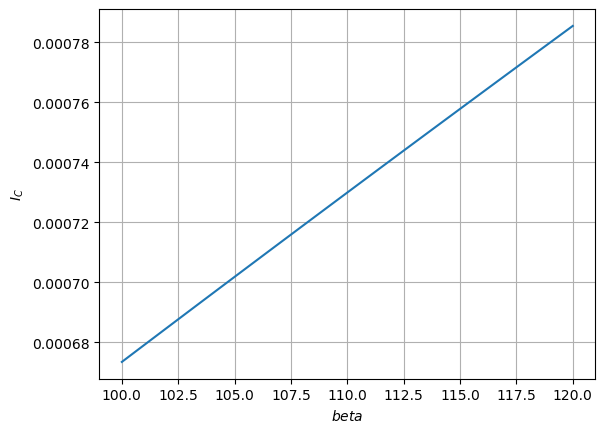

In [21]:
plt.plot(Beta_range, I_C_list4);
plt.ylabel('$I_{C}$');
plt.xlabel('$beta$');
plt.grid()

# Section 3:
Based on the theoric relations we know that Gain value for the time when $R_{4} = 0$ will be:

$$ A_{v} = g_{m} \times R_{C} $$

which $R_{C}=R_{3}$. Additionaly $g_{m}= \frac{I_{C}}{V_{T}} $. thus we rewrite the relation as in a final form:

$$ A_{v} = \frac{I_{C}}{V_{T}} \times R_{C} $$


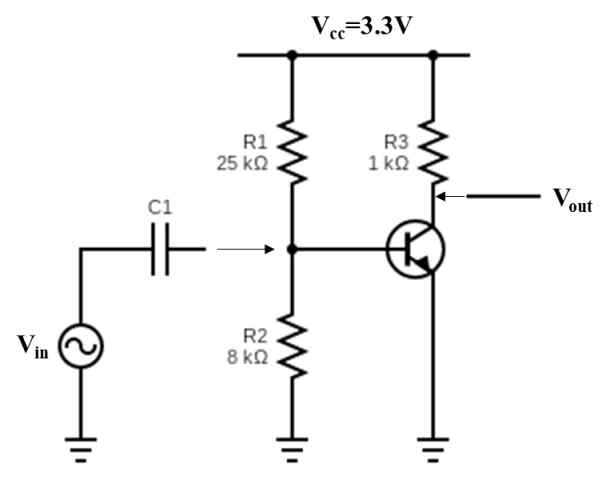

In [74]:
from PIL import Image
myImage = Image.open("Pictures//Project3.jpg")
myImage

In [23]:
g_m=0
A_v=0
Av_list1=list()
for Ic in I_C_list1:
    g_m=(Ic)/V_T
    A_v=g_m*R3
    Av_list1.append(A_v)

We will try to plot variation in gain for the change in $R_{2}$. 

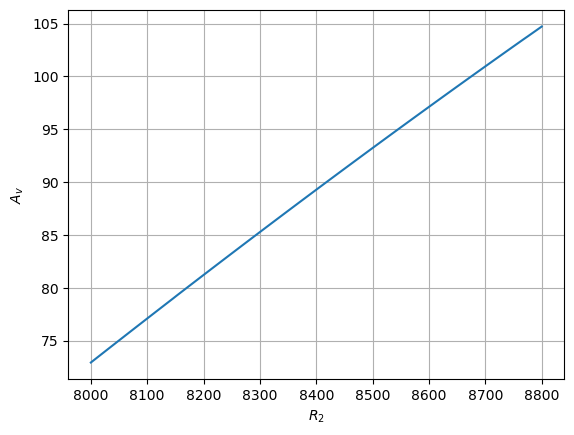

In [24]:
plt.plot(R2_range, Av_list1);
plt.ylabel('$A_{v}$');
plt.xlabel('$R_{2}$');
plt.grid()

In [25]:
g_m=0
A_v=0
Av_list2=list()
for Ic in I_C_list2:
    g_m=(Ic)/V_T
    A_v=g_m*R3
    Av_list2.append(A_v)

We will try to plot variation in gain for the change in $\beta$. 

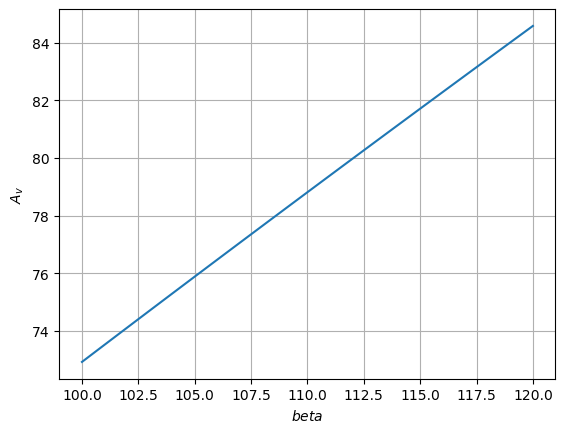

In [26]:
plt.plot(Beta_range, Av_list2);
plt.ylabel('$A_{v}$');
plt.xlabel('$beta$');
plt.grid()

As we take $R_{4}$ to the consideration, relations will be in the form below:

$$ A_{v} = \frac{g_{m} \times R_{C}}{1+ R_{E}\times g_{m}} $$

which $R_{C}=R_{3}$ and $R_{E}=R_{4}$ . Additionaly $g_{m}= \frac{I_{C}}{V_{T}} $. thus we rewrite the relation as in a final form:

$$ A_{v} = \frac{I_{C}}{V_{T}} \times R_{C} $$


In [27]:
g_m=0
A_v=0
Av_list3=list()
for Ic in I_C_list3:
    g_m=(Ic) / (V_T)
    A_v=(g_m*R3) / (1+R4*g_m)
    Av_list3.append(A_v)

We will try to plot variation in gain for the change in $R_{2}$. 

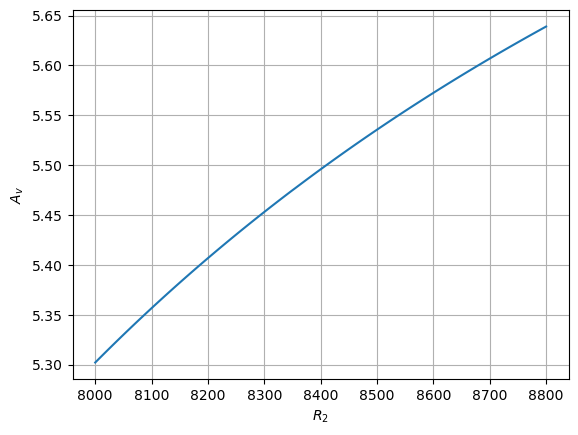

In [28]:
plt.plot(R2_range, Av_list3);
plt.ylabel('$A_{v}$');
plt.xlabel('$R_{2}$');
plt.grid();

In [29]:
g_m=0
A_v=0
Av_list4=list()
for Ic in I_C_list4:
    g_m=(Ic) / (V_T)
    A_v=(g_m*R4) / (1+R4*g_m)
    Av_list4.append(A_v)

We will try to plot variation in gain for the change in $\beta$. 

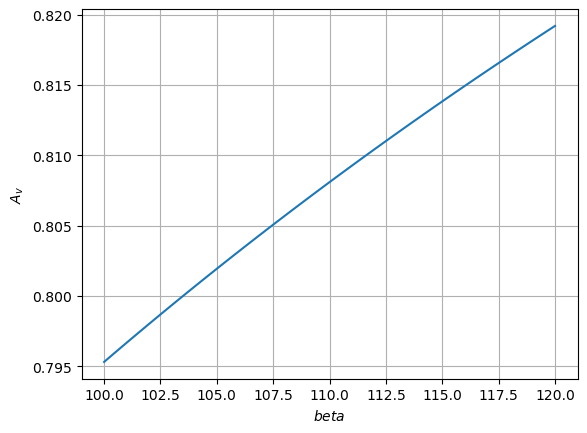

In [30]:
plt.plot(Beta_range, Av_list4);
# plt.xlim(100, 120)
# plt.ylim(4,7)
plt.ylabel('$A_{v}$');
plt.xlabel('$beta$');
plt.grid()

As a concolusion we observe that when we add up $R_{E}$ to our circuit, it changes gain value decreases and as we reach to high values with $R_{2}$ and $\beta$, gain will be consistent. In another words the $R_{E}$ eliminates the dependancy of gain to circuit properties and cancels the errors caused by other Resistors.   